In [495]:
import numpy as np

In [496]:
import pandas as pd

In [497]:
import seaborn as sns

In [498]:
import matplotlib.pyplot as plt

In [499]:
from sklearn.model_selection import train_test_split

In [500]:
d1=pd.read_csv('LoansData (1).csv')

In [501]:
d1.shape

(2500, 15)

In [502]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   object 
 4   Loan.Length                     2500 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

# Naming convention

In [503]:
d1.columns = [i.replace('.', '_') for i in d1.columns]   # naming convention


In [504]:
d1.head()


,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


# Replace % months years < +  ....... etc 

In [505]:
d1['Interest_Rate'] = d1['Interest_Rate'].str.replace('%', '').astype('float')

In [506]:
d1['Debt_To_Income_Ratio']=d1['Debt_To_Income_Ratio'].str.replace('%', '').astype('float')

In [507]:
d1['Loan_Length']=d1['Loan_Length'].str.replace('months', '').astype('float')

In [508]:
d1['Employment_Length'] = d1['Employment_Length'].str.replace('years','').str.replace('year','').str.replace('<','').str.replace('+','').astype('float')

In [509]:
d1['FICO_Range'] = d1['FICO_Range'].str.split('-', expand=True)[0].astype('float')

In [510]:
d1.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695.0,11.0,14469.0,0.0,9.0


# Checking the duplicated values and treatment 

In [511]:
d1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Length: 2500, dtype: bool

In [512]:
d1.duplicated().sum()

np.int64(0)

# Splitting into catagorical and numerical data 

In [513]:
categorical = [var for var in d1.columns if d1[var].dtype == 'O']
cat_d1=d1[categorical]
cat_d1

,Loan_Purpose,State,Home_Ownership
0,debt_consolidation,SC,MORTGAGE
1,debt_consolidation,TX,MORTGAGE
2,debt_consolidation,CA,MORTGAGE
3,debt_consolidation,KS,MORTGAGE
4,credit_card,NJ,RENT
...,...,...,...
2495,debt_consolidation,NY,MORTGAGE
2496,home_improvement,MD,OWN
2497,debt_consolidation,PA,MORTGAGE
2498,major_purchase,NJ,RENT


In [514]:
numerical = [var for var in d1.columns if d1[var].dtype != 'O']
num_d1= d1[numerical]
num_d1

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.00,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.00,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.00,21.98,60.0,23.81,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.00,9.99,36.0,14.30,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.00,11.71,36.0,18.78,3195.00,695.0,11.0,14469.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,60.0,19.23,9250.00,705.0,15.0,45880.0,1.0,8.0
2496,2497,16000.0,16000.00,14.09,60.0,21.54,8903.25,740.0,18.0,18898.0,1.0,10.0
2497,2498,10000.0,10000.00,13.99,36.0,4.89,2166.67,680.0,4.0,4544.0,0.0,10.0
2498,2499,6000.0,6000.00,12.42,36.0,16.66,3500.00,675.0,8.0,7753.0,0.0,5.0


In [515]:
num_d1.shape

(2500, 12)

In [516]:
cat_d1.shape

(2500, 3)

In [517]:
cat_d1['LoanID']=d1['LoanID']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11984\3963372861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_d1['LoanID']=d1['LoanID']


# Num data - Missing value treatment on numerrical data 

In [518]:
num_fill = num_d1.fillna(num_d1.median(numeric_only=True))
num_fill

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.00,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.00,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.00,21.98,60.0,23.81,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.00,9.99,36.0,14.30,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.00,11.71,36.0,18.78,3195.00,695.0,11.0,14469.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,60.0,19.23,9250.00,705.0,15.0,45880.0,1.0,8.0
2496,2497,16000.0,16000.00,14.09,60.0,21.54,8903.25,740.0,18.0,18898.0,1.0,10.0
2497,2498,10000.0,10000.00,13.99,36.0,4.89,2166.67,680.0,4.0,4544.0,0.0,10.0
2498,2499,6000.0,6000.00,12.42,36.0,16.66,3500.00,675.0,8.0,7753.0,0.0,5.0


In [519]:
num_fill.isna().sum()

LoanID                            0
Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Debt_To_Income_Ratio              0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

In [520]:
num_fill.describe()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1250.50000,12404.500000,12001.573236,13.065424,41.260800,15.380396,5688.655748,705.900000,10.071600,15218.054400,0.905600,5.476800
std,721.83216,7801.520636,7745.320754,4.175530,9.930893,7.503551,3962.349122,35.028571,4.504863,18270.638709,1.230811,3.389581
min,1.00000,1000.000000,-0.010000,5.420000,36.000000,0.000000,588.500000,640.000000,2.000000,0.000000,0.000000,1.000000
25%,625.75000,6000.000000,6000.000000,10.160000,36.000000,9.750000,3500.000000,680.000000,7.000000,5589.250000,0.000000,2.000000
50%,1250.50000,10000.000000,10000.000000,13.110000,36.000000,15.320000,5000.000000,700.000000,9.000000,10948.000000,0.000000,5.000000
75%,1875.25000,17000.000000,16000.000000,15.800000,36.000000,20.672500,6800.000000,725.000000,13.000000,18843.750000,1.000000,10.000000
max,2500.00000,35000.000000,35000.000000,24.890000,60.000000,34.910000,102750.000000,830.000000,38.000000,270800.000000,9.000000,10.000000


# Num data - Box plot outlier treatment by IQR method 

In [521]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

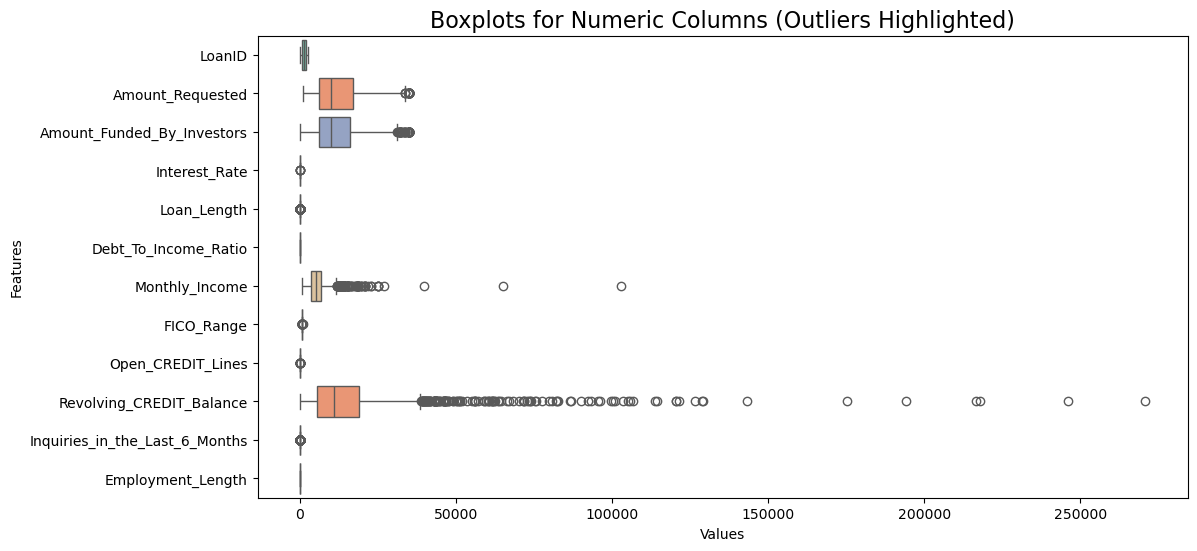

In [522]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=num_fill, orient="h", palette="Set2")
 
# Add title and labels

plt.title("Boxplots for Numeric Columns (Outliers Highlighted)", fontsize=16)

plt.xlabel("Values")

plt.ylabel("Features")

plt.show()
 

# Num data - Outlier treatment 

In [523]:
li = ['Amount_Requested','Interest_Rate','Loan_Length','FICO_Range','Open_CREDIT_Lines','Inquiries_in_the_Last_6_Months']

num_fill_copy = num_fill.copy()

for i in num_fill_copy:

    if i in li:

        lc, uc = outliertreat_IQR(num_fill_copy[i])

        num_fill_copy[i] = num_fill_copy[i].clip(lc, uc)

num_fill_copy

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.00,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.00,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,33500.0,35000.00,21.98,36.0,23.81,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.00,9.99,36.0,14.30,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.00,11.71,36.0,18.78,3195.00,695.0,11.0,14469.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,36.0,19.23,9250.00,705.0,15.0,45880.0,1.0,8.0
2496,2497,16000.0,16000.00,14.09,36.0,21.54,8903.25,740.0,18.0,18898.0,1.0,10.0
2497,2498,10000.0,10000.00,13.99,36.0,4.89,2166.67,680.0,4.0,4544.0,0.0,10.0
2498,2499,6000.0,6000.00,12.42,36.0,16.66,3500.00,675.0,8.0,7753.0,0.0,5.0


# Catagorical data 

In [524]:
cat_d1

,Loan_Purpose,State,Home_Ownership,LoanID
0,debt_consolidation,SC,MORTGAGE,1
1,debt_consolidation,TX,MORTGAGE,2
2,debt_consolidation,CA,MORTGAGE,3
3,debt_consolidation,KS,MORTGAGE,4
4,credit_card,NJ,RENT,5
...,...,...,...,...
2495,debt_consolidation,NY,MORTGAGE,2496
2496,home_improvement,MD,OWN,2497
2497,debt_consolidation,PA,MORTGAGE,2498
2498,major_purchase,NJ,RENT,2499


# Catagorical data - Checking the values


<Axes: xlabel='Loan_Purpose'>

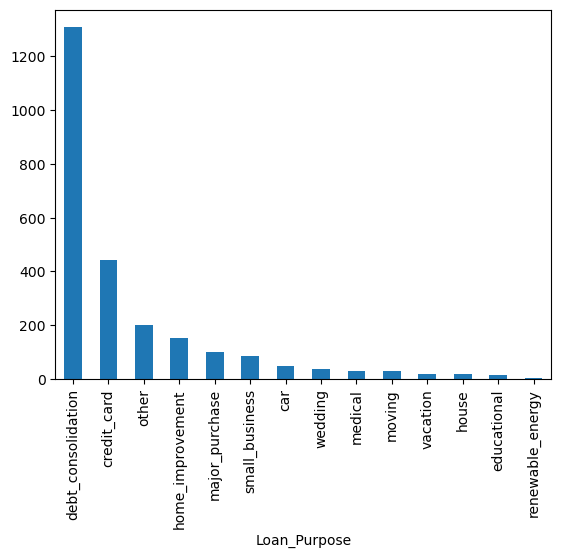

In [525]:

cat_d1.Loan_Purpose.value_counts().plot(kind="bar")


<Axes: xlabel='State'>

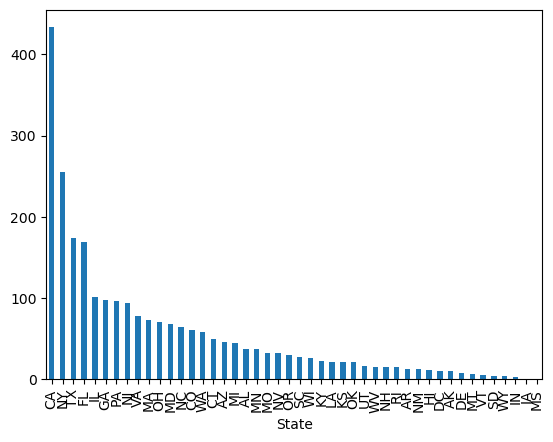

In [526]:
cat_d1.State.value_counts().plot(kind="bar")


# Catagorical data - Missing value treatment 

In [527]:

#Missing value treatment 

d1['Loan_Purpose'].value_counts()

Loan_Purpose
debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: count, dtype: int64

In [528]:
d1['State'].value_counts()

State
CA    433
NY    255
TX    174
FL    169
IL    101
GA     98
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
AL     38
MN     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
KS     21
OK     21
UT     16
WV     15
NH     15
RI     15
AR     13
NM     13
HI     12
DC     11
AK     11
DE      8
MT      7
VT      5
SD      4
WY      4
IN      3
IA      1
MS      1
Name: count, dtype: int64

In [529]:
d1['Home_Ownership'].value_counts()

Home_Ownership
MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: count, dtype: int64

In [530]:
cat_d1[cat_d1['Home_Ownership'].isnull()]


,Loan_Purpose,State,Home_Ownership,LoanID
2492,debt_consolidation,NJ,NaN,2493


In [531]:
cat_d1 = cat_d1.drop(index=2492)
cat_d1 = cat_d1.reset_index()

In [532]:
cat_d1 = cat_d1.drop(columns='index')

In [533]:
cat_d1.shape

(2499, 4)

# Catagorical data-One hot data encoding decoding 


In [534]:
cat_d1_copy=cat_d1.copy()
cat_d1_copy.drop(columns='State')
pd.get_dummies(cat_d1_copy, columns=['Loan_Purpose', 'Home_Ownership'], dtype=int)

,State,LoanID,Loan_Purpose_car,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_educational,Loan_Purpose_home_improvement,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_medical,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,SC,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,TX,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,CA,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,KS,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,NJ,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,NY,2496,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2495,MD,2497,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2496,PA,2498,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2497,NJ,2499,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [535]:
cat_d1_copy = cat_d1_copy.drop(columns='State')

In [536]:
cat_d1_updated = pd.get_dummies(cat_d1_copy, columns=['Loan_Purpose', 'Home_Ownership'], dtype=int)

In [537]:
cat_d1_updated.head()

,LoanID,Loan_Purpose_car,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_educational,Loan_Purpose_home_improvement,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_medical,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Mergeing both datas 

In [538]:
merge_data = pd.merge(
    num_fill_copy,
    cat_d1_updated,
    how='inner',
    left_on='LoanID', right_on='LoanID'   
)



merge_data.shape

(2499, 31)

In [539]:
data1c = merge_data.copy() 

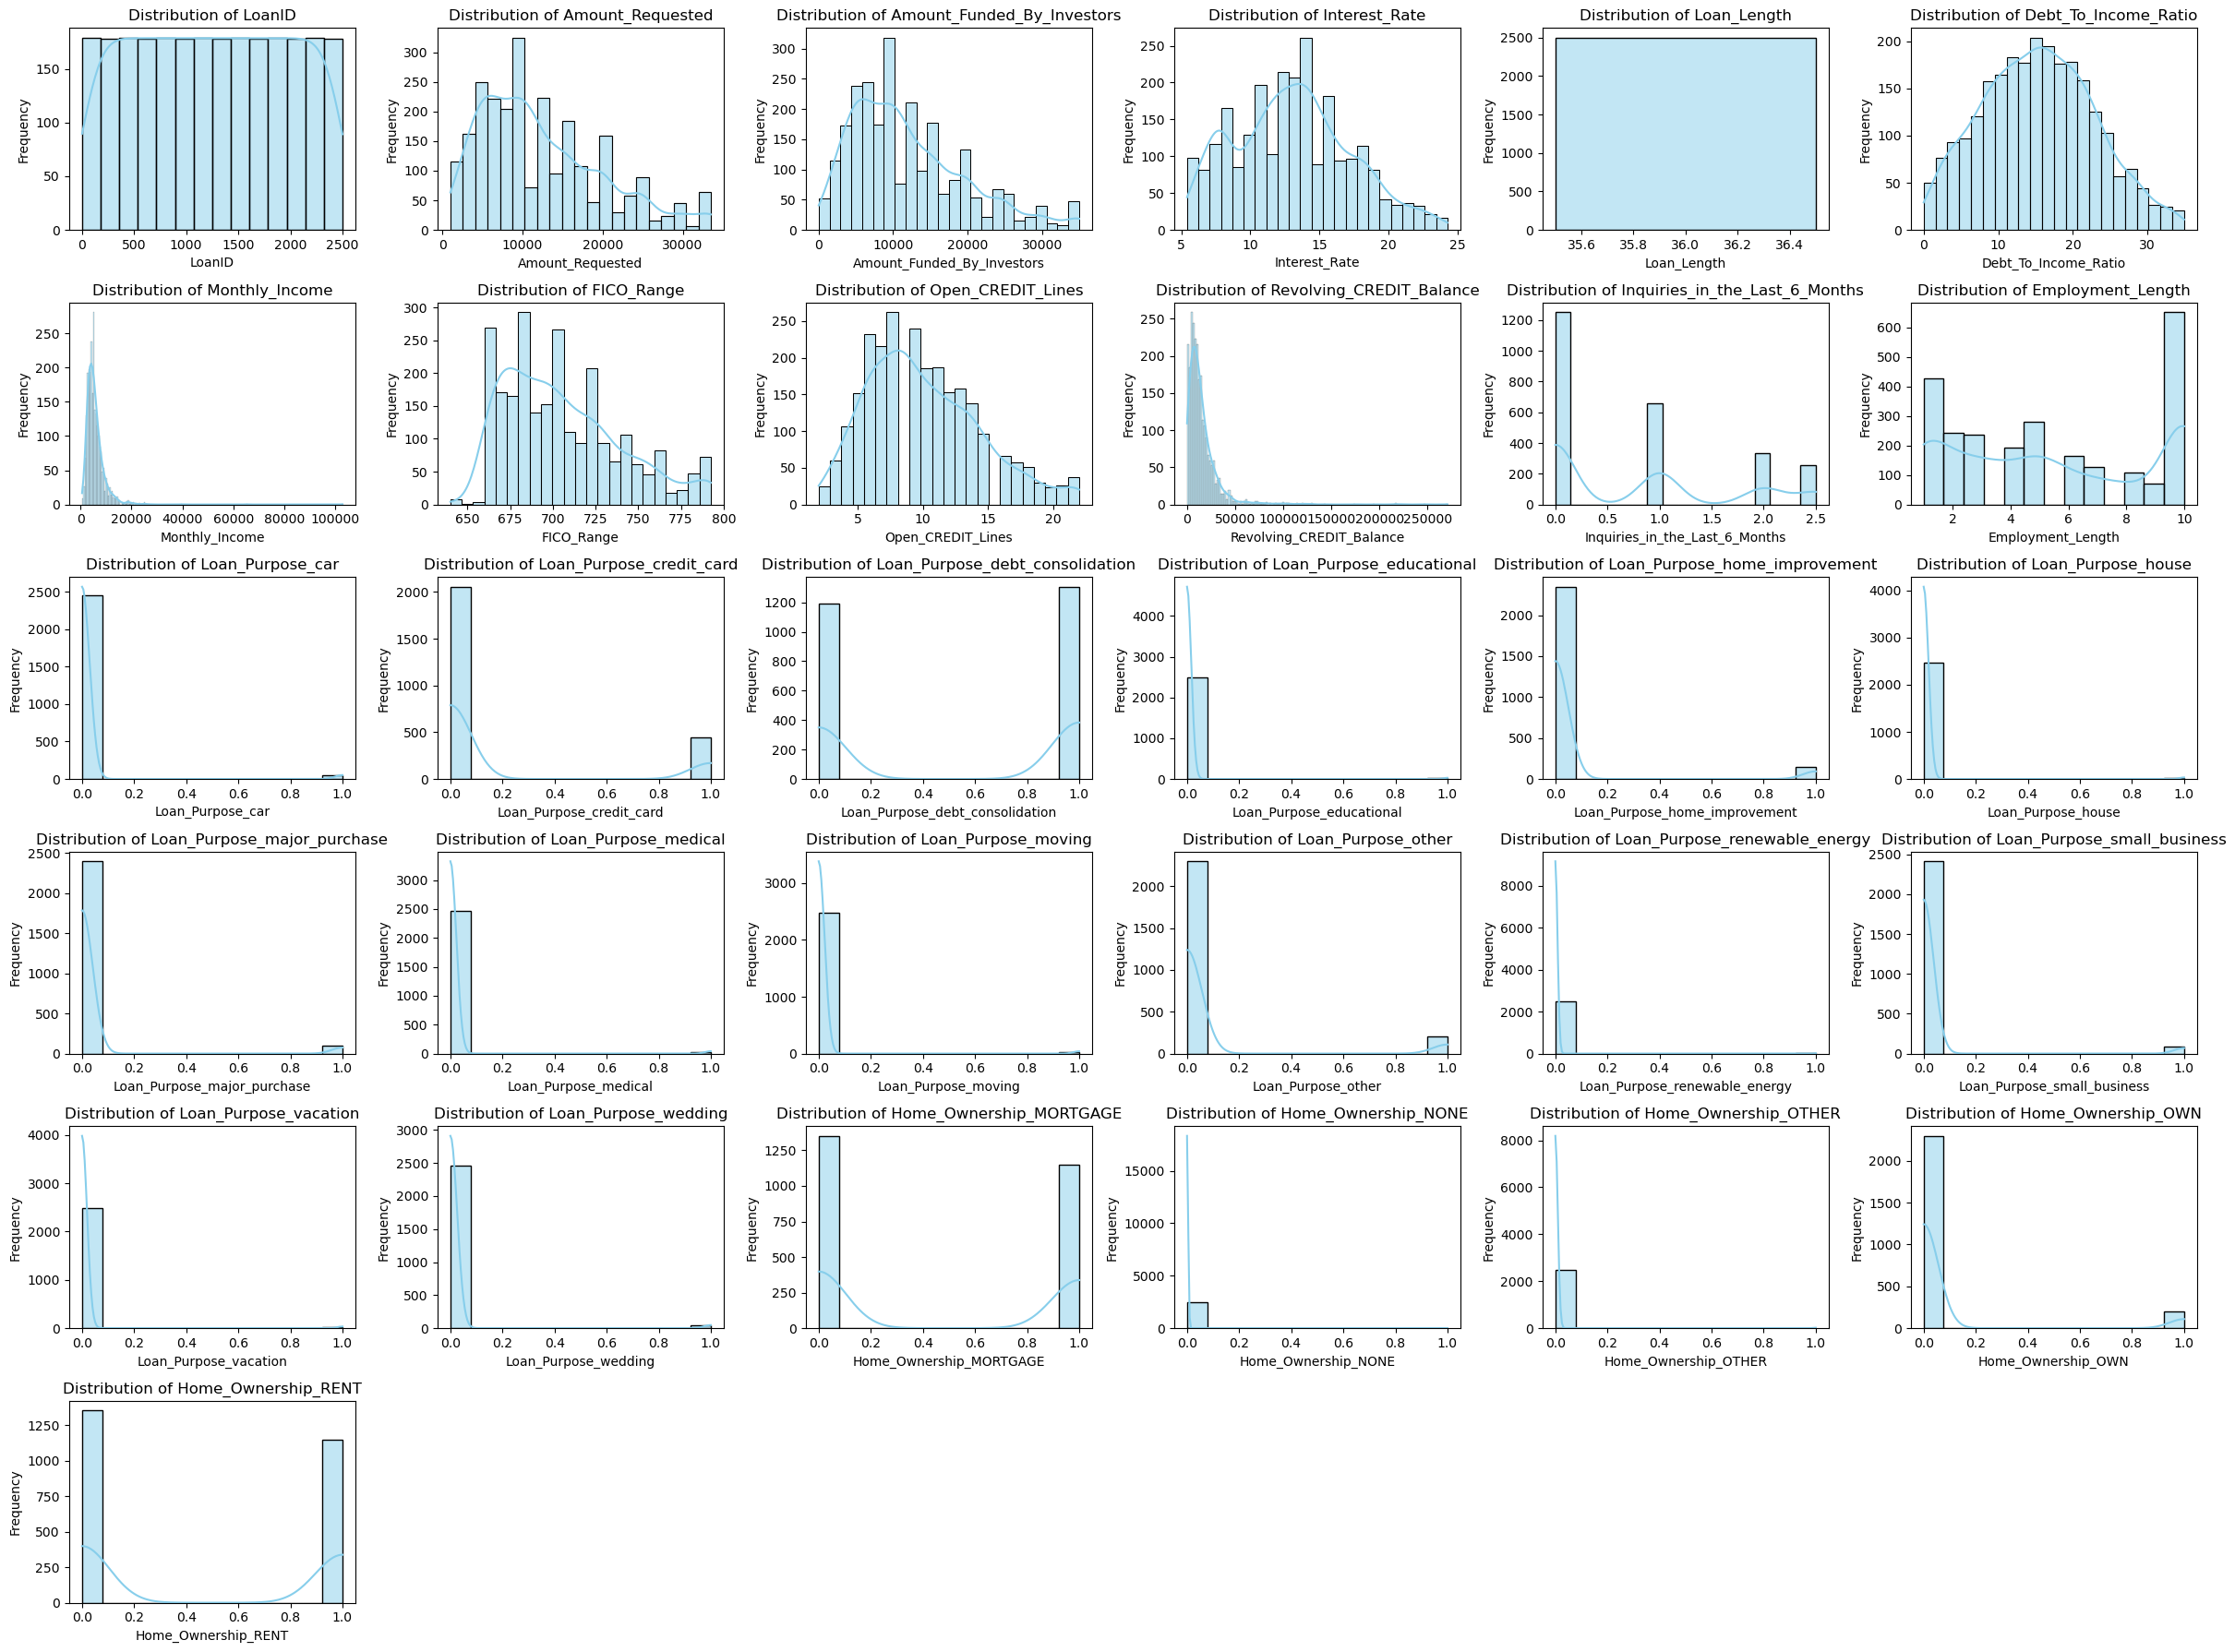

In [540]:
import math
cols = data1c.columns
n = len(cols)
ncols = math.ceil(math.sqrt(n))
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 3*nrows))
axes = axes.flatten()
for i, col in enumerate(cols):
    if pd.api.types.is_numeric_dtype(data1c[col]):
        sns.histplot(data1c[col].dropna(), kde=True, ax=axes[i], color="skyblue")
        axes[i].set_ylabel("Frequency")
    else:
        sns.countplot(x=data1c[col], ax=axes[i], palette="Set2")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [541]:
data1c.describe()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
count,2499.000000,2499.000000,2499.00000,2499.000000,2499.0,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,...,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,1250.002801,12375.770308,12003.83477,13.065734,36.0,15.380420,5688.864626,705.655262,10.033613,15221.817127,...,0.080432,0.001601,0.034814,0.008403,0.015606,0.458984,0.000400,0.002001,0.080032,0.458583
std,721.548325,7714.431030,7746.04527,4.173509,0.0,7.505052,3963.128380,34.369002,4.360606,18273.326539,...,0.272016,0.039984,0.183345,0.091302,0.123971,0.498415,0.020004,0.044694,0.271397,0.498381
min,1.000000,1000.000000,-0.01000,5.420000,36.0,0.000000,588.500000,640.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,625.500000,6000.000000,6000.00000,10.160000,36.0,9.750000,3500.000000,680.000000,7.000000,5587.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1250.000000,10000.000000,10000.00000,13.110000,36.0,15.320000,5000.000000,700.000000,9.000000,10948.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1874.500000,17000.000000,16000.00000,15.800000,36.0,20.675000,6800.000000,725.000000,13.000000,18849.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2500.000000,33500.000000,35000.00000,24.260000,36.0,34.910000,102750.000000,792.500000,22.000000,270800.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [542]:
sqrt_cols = ["Amount_Requested", "Amount_Funded_By_Investors", "Interest_Rate", "Open_CREDIT_Lines"]
for col in sqrt_cols:
    if col in data1c.columns:
        data1c[col] = np.sqrt(data1c[col].clip(lower=0))
log_cols = ["Monthly_Income", "Revolving_CREDIT_Balance"]
for col in log_cols:
    if col in data1c.columns:
        data1c[col] = np.log1p(data1c[col].clip(lower=0))
print("New columns added:")
print([c for c in data1c.columns if c.endswith("_sqrt") or c.endswith("_log")])

New columns added:
[]


In [543]:
data1c.describe()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.0,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,...,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,1250.002801,105.751411,103.654073,3.566956,36.0,15.380420,8.502135,705.655262,3.091372,9.025003,...,0.080432,0.001601,0.034814,0.008403,0.015606,0.458984,0.000400,0.002001,0.080032,0.458583
std,721.548325,34.538193,35.498904,0.585405,0.0,7.505052,0.522896,34.369002,0.690814,1.592956,...,0.272016,0.039984,0.183345,0.091302,0.123971,0.498415,0.020004,0.044694,0.271397,0.498381
min,1.000000,31.622777,0.000000,2.328089,36.0,0.000000,6.379275,640.000000,1.414214,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,625.500000,77.459667,77.459667,3.187475,36.0,9.750000,8.160804,680.000000,2.645751,8.628466,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1250.000000,100.000000,100.000000,3.620773,36.0,15.320000,8.517393,700.000000,3.000000,9.301003,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1874.500000,130.384048,126.491106,3.974921,36.0,20.675000,8.824825,725.000000,3.605551,9.844295,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2500.000000,183.030052,187.082869,4.925444,36.0,34.910000,11.540064,792.500000,4.690416,12.509140,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Standardization 

In [544]:
import scipy as sp

In [545]:
from scipy import stats


In [546]:
data2c=merge_data.copy()

In [547]:
data2c_z = data2c.apply(stats.zscore)

C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


In [548]:
data2c_z.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,-1.731350,0.988505,1.032497,-0.998337,NaN,-0.064026,0.215228,0.853985,0.909777,-0.051989,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,1.085692,-0.020008,-0.044775,-0.294948,-0.920330
1,-1.729964,0.884783,0.929197,-0.226649,NaN,1.729792,-0.279011,0.271949,0.451034,-0.223420,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,1.085692,-0.020008,-0.044775,-0.294948,-0.920330
2,-1.728578,2.738823,2.969356,2.136344,NaN,1.123412,1.466594,-0.455596,0.909777,0.369748,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,1.085692,-0.020008,-0.044775,-0.294948,-0.920330
3,-1.727192,-0.308026,-0.261971,-0.737114,NaN,-0.143988,-0.468293,-0.310087,-0.007710,-0.321616,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,1.085692,-0.020008,-0.044775,-0.294948,-0.920330
4,-1.725805,-0.048720,-0.000495,-0.324908,NaN,0.453063,-0.629393,-0.310087,0.221662,-0.041206,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,-0.921072,-0.020008,-0.044775,-0.294948,1.086567


In [549]:
data1c_z = data1c.apply(stats.zscore)


C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


In [550]:
data1c.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,1,141.421356,141.421356,2.983287,36.0,14.90,8.786101,735.0,3.741657,9.566125,...,0,0,0,0,0,1,0,0,0,0
1,2,138.564065,138.564065,3.481379,36.0,28.36,8.430399,715.0,3.464102,9.318387,...,0,0,0,0,0,1,0,0,0,0
2,3,183.030052,187.082869,4.688283,36.0,23.81,9.350189,690.0,3.741657,9.997797,...,0,0,0,0,0,1,0,0,0,0
3,4,100.000000,99.874922,3.160696,36.0,14.30,8.251750,695.0,3.162278,9.142811,...,0,0,0,0,0,1,0,0,0,0
4,5,109.544512,109.544512,3.421988,36.0,18.78,8.069655,695.0,3.316625,9.579833,...,0,0,0,0,0,0,0,0,0,1


In [551]:
data1c_z.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,-1.731350,1.032975,1.064113,-0.997234,NaN,-0.064026,0.543172,0.853985,0.941521,0.339765,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,1.085692,-0.020008,-0.044775,-0.294948,-0.920330
1,-1.729964,0.950230,0.983607,-0.146213,NaN,1.729792,-0.137216,0.271949,0.539659,0.184213,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,1.085692,-0.020008,-0.044775,-0.294948,-0.920330
2,-1.728578,2.237931,2.350650,1.915856,NaN,1.123412,1.622165,-0.455596,0.941521,0.610807,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,1.085692,-0.020008,-0.044775,-0.294948,-0.920330
3,-1.727192,-0.166557,-0.106480,-0.694119,NaN,-0.143988,-0.478938,-0.310087,0.102661,0.073970,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,1.085692,-0.020008,-0.044775,-0.294948,-0.920330
4,-1.725805,0.109845,0.165966,-0.247686,NaN,0.453063,-0.827250,-0.310087,0.326134,0.348372,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,-0.921072,-0.020008,-0.044775,-0.294948,1.086567


In [552]:
data2c_z.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,-1.731350,0.988505,1.032497,-0.998337,NaN,-0.064026,0.215228,0.853985,0.909777,-0.051989,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,1.085692,-0.020008,-0.044775,-0.294948,-0.920330
1,-1.729964,0.884783,0.929197,-0.226649,NaN,1.729792,-0.279011,0.271949,0.451034,-0.223420,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,1.085692,-0.020008,-0.044775,-0.294948,-0.920330
2,-1.728578,2.738823,2.969356,2.136344,NaN,1.123412,1.466594,-0.455596,0.909777,0.369748,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,1.085692,-0.020008,-0.044775,-0.294948,-0.920330
3,-1.727192,-0.308026,-0.261971,-0.737114,NaN,-0.143988,-0.468293,-0.310087,-0.007710,-0.321616,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,1.085692,-0.020008,-0.044775,-0.294948,-0.920330
4,-1.725805,-0.048720,-0.000495,-0.324908,NaN,0.453063,-0.629393,-0.310087,0.221662,-0.041206,...,-0.295749,-0.04004,-0.18992,-0.092057,-0.125911,-0.921072,-0.020008,-0.044775,-0.294948,1.086567


In [553]:
print(data1c.isna().sum())
print(data1c_z.isna().sum())
print(data2c_z.isna().sum())

LoanID                             0
Amount_Requested                   0
Amount_Funded_By_Investors         0
Interest_Rate                      0
Loan_Length                        0
Debt_To_Income_Ratio               0
Monthly_Income                     0
FICO_Range                         0
Open_CREDIT_Lines                  0
Revolving_CREDIT_Balance           0
Inquiries_in_the_Last_6_Months     0
Employment_Length                  0
Loan_Purpose_car                   0
Loan_Purpose_credit_card           0
Loan_Purpose_debt_consolidation    0
Loan_Purpose_educational           0
Loan_Purpose_home_improvement      0
Loan_Purpose_house                 0
Loan_Purpose_major_purchase        0
Loan_Purpose_medical               0
Loan_Purpose_moving                0
Loan_Purpose_other                 0
Loan_Purpose_renewable_energy      0
Loan_Purpose_small_business        0
Loan_Purpose_vacation              0
Loan_Purpose_wedding               0
Home_Ownership_MORTGAGE            0
H

In [554]:
data1c= data1c.drop(columns='Loan_Length')

In [555]:
data1c_z= data1c_z.drop(columns='Loan_Length')

In [556]:
data2c_z= data2c_z.drop(columns='Loan_Length')

In [557]:
print(data1c.isna().sum())
print(data1c_z.isna().sum())
print(data2c_z.isna().sum())

LoanID                             0
Amount_Requested                   0
Amount_Funded_By_Investors         0
Interest_Rate                      0
Debt_To_Income_Ratio               0
Monthly_Income                     0
FICO_Range                         0
Open_CREDIT_Lines                  0
Revolving_CREDIT_Balance           0
Inquiries_in_the_Last_6_Months     0
Employment_Length                  0
Loan_Purpose_car                   0
Loan_Purpose_credit_card           0
Loan_Purpose_debt_consolidation    0
Loan_Purpose_educational           0
Loan_Purpose_home_improvement      0
Loan_Purpose_house                 0
Loan_Purpose_major_purchase        0
Loan_Purpose_medical               0
Loan_Purpose_moving                0
Loan_Purpose_other                 0
Loan_Purpose_renewable_energy      0
Loan_Purpose_small_business        0
Loan_Purpose_vacation              0
Loan_Purpose_wedding               0
Home_Ownership_MORTGAGE            0
Home_Ownership_NONE                0
H

# data1c    Transformation
# data1c_z  Transformation + Standardization
# data2c_z  Scandardization
# data3c    Normal Data 

In [558]:
data3c=merge_data.copy()

In [559]:
data3c= data3c.drop(columns='Loan_Length')

# For the transformtion 
## Feature engineering

In [560]:
corr = data1c.corrwith(data1c['Interest_Rate']).abs().sort_values(ascending = False)


In [561]:
#data1c.corrwith(data1c['Interest_Rate']).abs().sort_values(ascending = False).mean()
data1c.corrwith(data1c['Interest_Rate']).abs().sort_values(ascending = False).median()

0.04323285880678221

In [562]:
v = corr[np.abs(corr) > 0.04]
v = list(v.index)
v

['Interest_Rate',
 'FICO_Range',
 'Amount_Requested',
 'Amount_Funded_By_Investors',
 'Inquiries_in_the_Last_6_Months',
 'Debt_To_Income_Ratio',
 'Revolving_CREDIT_Balance',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
 'Home_Ownership_MORTGAGE',
 'Loan_Purpose_car',
 'Open_CREDIT_Lines',
 'Employment_Length',
 'Loan_Purpose_medical']

In [563]:
transf_df1 = data1c[v]
transf_df1.head()

,Interest_Rate,FICO_Range,Amount_Requested,Amount_Funded_By_Investors,Inquiries_in_the_Last_6_Months,Debt_To_Income_Ratio,Revolving_CREDIT_Balance,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Home_Ownership_RENT,Home_Ownership_MORTGAGE,Loan_Purpose_car,Open_CREDIT_Lines,Employment_Length,Loan_Purpose_medical
0,2.983287,735.0,141.421356,141.421356,2.0,14.90,9.566125,1,0,0,0,1,0,3.741657,1.0,0
1,3.481379,715.0,138.564065,138.564065,1.0,28.36,9.318387,1,0,0,0,1,0,3.464102,2.0,0
2,4.688283,690.0,183.030052,187.082869,1.0,23.81,9.997797,1,0,0,0,1,0,3.741657,2.0,0
3,3.160696,695.0,100.000000,99.874922,0.0,14.30,9.142811,1,0,0,0,1,0,3.162278,5.0,0
4,3.421988,695.0,109.544512,109.544512,0.0,18.78,9.579833,0,0,0,1,0,0,3.316625,9.0,0


In [564]:
transf_df1.columns

Index(['Interest_Rate', 'FICO_Range', 'Amount_Requested',
       'Amount_Funded_By_Investors', 'Inquiries_in_the_Last_6_Months',
       'Debt_To_Income_Ratio', 'Revolving_CREDIT_Balance',
       'Loan_Purpose_debt_consolidation', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_home_improvement', 'Home_Ownership_RENT',
       'Home_Ownership_MORTGAGE', 'Loan_Purpose_car', 'Open_CREDIT_Lines',
       'Employment_Length', 'Loan_Purpose_medical'],
      dtype='object')

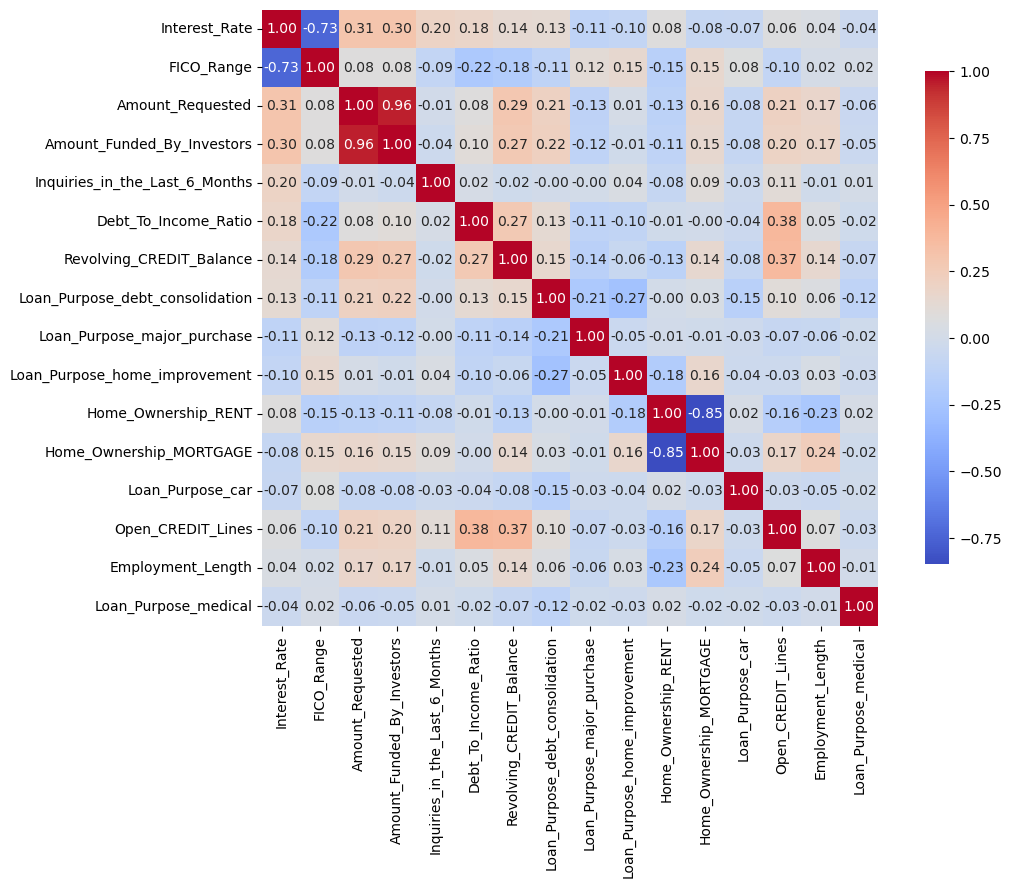

In [565]:
plt.figure(figsize=(12, 8))  # Adjust width, height
sns.heatmap(transf_df1.corr(), annot=True, fmt=".2f", cmap='coolwarm',square=True, cbar_kws={"shrink": .8})
plt.show()

# Splitting data into training , testing 

In [566]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [567]:
import statsmodels.formula.api as smf


In [568]:
X = transf_df1.drop('Interest_Rate', axis=1)
y = transf_df1['Interest_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [569]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1999, 15) (500, 15) (1999,) (500,)


# Model building : ols regression 

In [608]:
formula = 'Interest_Rate ~ ' + ' + '.join(transf_df1.columns.difference(['Loan_Purpose_car','Loan_Purpose_medical','Loan_Purpose_major_purchase','Interest_Rate','Loan_Purpose_home_improvement','Home_Ownership_RENT','Home_Ownership_MORTGAGE','Employment_Length']))
formula

'Interest_Rate ~ Amount_Funded_By_Investors + Amount_Requested + Debt_To_Income_Ratio + FICO_Range + Inquiries_in_the_Last_6_Months + Loan_Purpose_debt_consolidation + Open_CREDIT_Lines + Revolving_CREDIT_Balance'

In [610]:
ols_model = smf.ols(formula=formula, data=transf_df1).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     766.2
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:53:45   Log-Likelihood:                -655.80
No. Observations:                2499   AIC:                             1330.
Df Residuals:                    2490   BIC:                             1382.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

# For the transformtion + Standardization 


In [611]:
corr2 = data1c_z.corrwith(data1c_z['Interest_Rate']).abs().sort_values(ascending = False)

In [612]:
data1c_z.corrwith(data1c_z['Interest_Rate']).abs().sort_values(ascending = False).median()

0.04323285880678225

In [613]:
v2 = corr2[np.abs(corr2) > 0.04]
v2= list(v2.index)
v2

['Interest_Rate',
 'FICO_Range',
 'Amount_Requested',
 'Amount_Funded_By_Investors',
 'Inquiries_in_the_Last_6_Months',
 'Debt_To_Income_Ratio',
 'Revolving_CREDIT_Balance',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
 'Home_Ownership_MORTGAGE',
 'Loan_Purpose_car',
 'Open_CREDIT_Lines',
 'Employment_Length',
 'Loan_Purpose_medical']

In [614]:
transf_df2 = data1c_z[v2]
transf_df2.head()

,Interest_Rate,FICO_Range,Amount_Requested,Amount_Funded_By_Investors,Inquiries_in_the_Last_6_Months,Debt_To_Income_Ratio,Revolving_CREDIT_Balance,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Home_Ownership_RENT,Home_Ownership_MORTGAGE,Loan_Purpose_car,Open_CREDIT_Lines,Employment_Length,Loan_Purpose_medical
0,-0.997234,0.853985,1.032975,1.064113,1.341413,-0.064026,0.339765,0.955760,-0.205228,-0.254487,-0.920330,1.085692,-0.142886,0.941521,-1.320690,-0.11023
1,-0.146213,0.271949,0.950230,0.983607,0.236356,1.729792,0.184213,0.955760,-0.205228,-0.254487,-0.920330,1.085692,-0.142886,0.539659,-1.025563,-0.11023
2,1.915856,-0.455596,2.237931,2.350650,0.236356,1.123412,0.610807,0.955760,-0.205228,-0.254487,-0.920330,1.085692,-0.142886,0.941521,-1.025563,-0.11023
3,-0.694119,-0.310087,-0.166557,-0.106480,-0.868702,-0.143988,0.073970,0.955760,-0.205228,-0.254487,-0.920330,1.085692,-0.142886,0.102661,-0.140182,-0.11023
4,-0.247686,-0.310087,0.109845,0.165966,-0.868702,0.453063,0.348372,-1.046288,-0.205228,-0.254487,1.086567,-0.921072,-0.142886,0.326134,1.040325,-0.11023


In [615]:
transf_df2.columns

Index(['Interest_Rate', 'FICO_Range', 'Amount_Requested',
       'Amount_Funded_By_Investors', 'Inquiries_in_the_Last_6_Months',
       'Debt_To_Income_Ratio', 'Revolving_CREDIT_Balance',
       'Loan_Purpose_debt_consolidation', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_home_improvement', 'Home_Ownership_RENT',
       'Home_Ownership_MORTGAGE', 'Loan_Purpose_car', 'Open_CREDIT_Lines',
       'Employment_Length', 'Loan_Purpose_medical'],
      dtype='object')

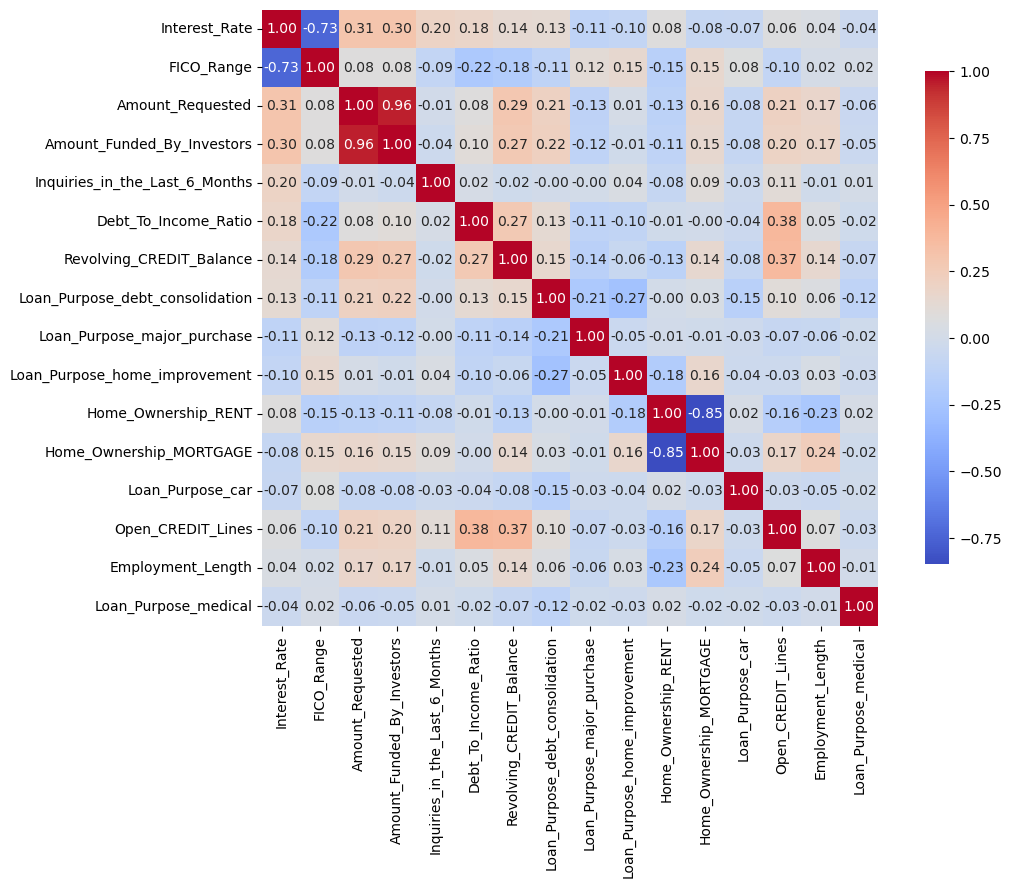

In [616]:
plt.figure(figsize=(12, 8))  # Adjust width, height
sns.heatmap(transf_df2.corr(), annot=True, fmt=".2f", cmap='coolwarm',square=True, cbar_kws={"shrink": .8})
plt.show()

In [617]:
X = transf_df2.drop('Interest_Rate', axis=1)
y = transf_df2['Interest_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [618]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1999, 15) (500, 15) (1999,) (500,)


In [619]:
formula2 = 'Interest_Rate ~ ' + ' + '.join(transf_df2.columns.difference(['Interest_Rate']))
formula2

'Interest_Rate ~ Amount_Funded_By_Investors + Amount_Requested + Debt_To_Income_Ratio + Employment_Length + FICO_Range + Home_Ownership_MORTGAGE + Home_Ownership_RENT + Inquiries_in_the_Last_6_Months + Loan_Purpose_car + Loan_Purpose_debt_consolidation + Loan_Purpose_home_improvement + Loan_Purpose_major_purchase + Loan_Purpose_medical + Open_CREDIT_Lines + Revolving_CREDIT_Balance'

In [620]:
ols_model2 = smf.ols(formula=formula2, data=transf_df2).fit()
print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     409.0
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:53:47   Log-Likelihood:                -1991.1
No. Observations:                2499   AIC:                             4014.
Df Residuals:                    2483   BIC:                             4107.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

# for standardisation

In [621]:
corr3 = data2c_z.corrwith(data2c_z['Interest_Rate']).abs().sort_values(ascending = False)

In [622]:
data2c_z.corrwith(data2c_z['Interest_Rate']).abs().sort_values(ascending = False).median()

0.04587708777486122

In [623]:
v3 = corr3[np.abs(corr3) > 0.04]
v3 = list(v3.index)
v3

['Interest_Rate',
 'FICO_Range',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Inquiries_in_the_Last_6_Months',
 'Debt_To_Income_Ratio',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Open_CREDIT_Lines',
 'Home_Ownership_RENT',
 'Home_Ownership_MORTGAGE',
 'Loan_Purpose_car',
 'Revolving_CREDIT_Balance',
 'Employment_Length']

In [624]:
transf_df3 = data2c_z[v3]
transf_df3.head()

,Interest_Rate,FICO_Range,Amount_Funded_By_Investors,Amount_Requested,Inquiries_in_the_Last_6_Months,Debt_To_Income_Ratio,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Open_CREDIT_Lines,Home_Ownership_RENT,Home_Ownership_MORTGAGE,Loan_Purpose_car,Revolving_CREDIT_Balance,Employment_Length
0,-0.998337,0.853985,1.032497,0.988505,1.341413,-0.064026,0.955760,-0.205228,-0.254487,0.909777,-0.920330,1.085692,-0.142886,-0.051989,-1.320690
1,-0.226649,0.271949,0.929197,0.884783,0.236356,1.729792,0.955760,-0.205228,-0.254487,0.451034,-0.920330,1.085692,-0.142886,-0.223420,-1.025563
2,2.136344,-0.455596,2.969356,2.738823,0.236356,1.123412,0.955760,-0.205228,-0.254487,0.909777,-0.920330,1.085692,-0.142886,0.369748,-1.025563
3,-0.737114,-0.310087,-0.261971,-0.308026,-0.868702,-0.143988,0.955760,-0.205228,-0.254487,-0.007710,-0.920330,1.085692,-0.142886,-0.321616,-0.140182
4,-0.324908,-0.310087,-0.000495,-0.048720,-0.868702,0.453063,-1.046288,-0.205228,-0.254487,0.221662,1.086567,-0.921072,-0.142886,-0.041206,1.040325


In [625]:
transf_df3.columns

Index(['Interest_Rate', 'FICO_Range', 'Amount_Funded_By_Investors',
       'Amount_Requested', 'Inquiries_in_the_Last_6_Months',
       'Debt_To_Income_Ratio', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_major_purchase', 'Loan_Purpose_home_improvement',
       'Open_CREDIT_Lines', 'Home_Ownership_RENT', 'Home_Ownership_MORTGAGE',
       'Loan_Purpose_car', 'Revolving_CREDIT_Balance', 'Employment_Length'],
      dtype='object')

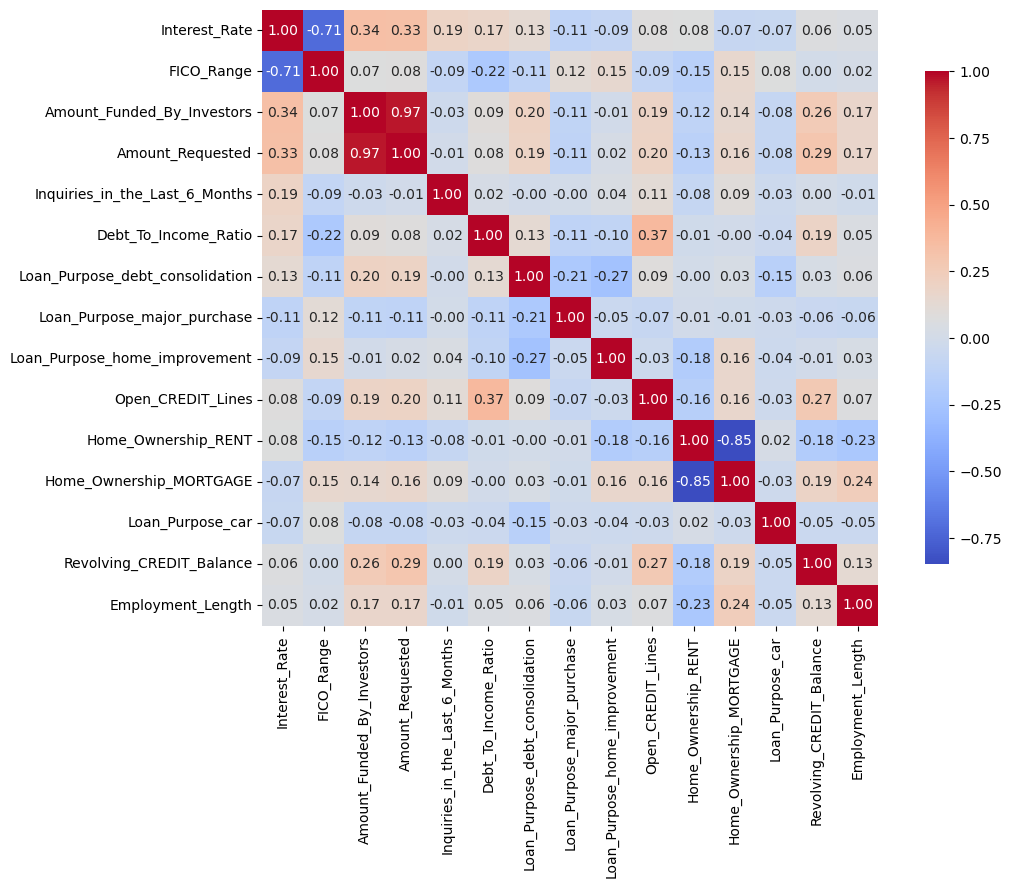

In [626]:
plt.figure(figsize=(12, 8))  # Adjust width, height
sns.heatmap(transf_df3.corr(), annot=True, fmt=".2f", cmap='coolwarm',square=True, cbar_kws={"shrink": .8})
plt.show()

In [627]:
X = transf_df3.drop('Interest_Rate', axis=1)
y = transf_df3['Interest_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [628]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1999, 14) (500, 14) (1999,) (500,)


In [629]:
formula3 = 'Interest_Rate ~ ' + ' + '.join(transf_df3.columns.difference(['Interest_Rate']))
formula3

'Interest_Rate ~ Amount_Funded_By_Investors + Amount_Requested + Debt_To_Income_Ratio + Employment_Length + FICO_Range + Home_Ownership_MORTGAGE + Home_Ownership_RENT + Inquiries_in_the_Last_6_Months + Loan_Purpose_car + Loan_Purpose_debt_consolidation + Loan_Purpose_home_improvement + Loan_Purpose_major_purchase + Open_CREDIT_Lines + Revolving_CREDIT_Balance'

In [630]:
ols_model3 = smf.ols(formula=formula3, data=transf_df3).fit()
print(ols_model3.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     398.4
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:53:48   Log-Likelihood:                -2075.0
No. Observations:                2499   AIC:                             4180.
Df Residuals:                    2484   BIC:                             4267.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

# Transformation = 72    ols_model
# transformation + standardisation = 72   ols_mode2
# standardisation = 69.2    ols_model3


In [631]:
train, test = train_test_split(transf_df1, test_size=0.2, random_state=42)

ols_model = smf.ols("Interest_Rate ~ Amount_Funded_By_Investors + Amount_Requested + Debt_To_Income_Ratio", 
                    data=train).fit()

y_train_pred = ols_model.predict(train)
y_test_pred  = ols_model.predict(test)

In [632]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


In [633]:
rmse = np.sqrt(mean_squared_error(test["Interest_Rate"], y_test_pred))
mae  = mean_absolute_error(test["Interest_Rate"], y_test_pred)
r2   = r2_score(test["Interest_Rate"], y_test_pred)
mape = np.mean(np.abs((test["Interest_Rate"] - y_test_pred) / test["Interest_Rate"])) * 100
print("MAPE:", mape, "%")
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)


MAPE: 13.88514056222196 %
RMSE: 0.5537141645180725
MAE: 0.45664606131493146
R² Score: 0.1293286475374661
